In [1]:
import sys
in_colab = 'google.colab' in sys.modules
if in_colab:
    # Install packages in Colab
    !pip install category_encoders==2.0.0
    !pip install pandas-profiling==2.3.0
    !pip install plotly==4.1.1

In [2]:
#Fetch smoking data file
from google.colab import files
uploaded = files.upload()

Saving cancerxx - for_import.csv to cancerxx - for_import.csv


In [3]:
# Load smoking data
import pandas as pd
import io
df_smoking = pd.read_csv(io.StringIO(uploaded['cancerxx - for_import.csv'].decode('utf-8')))
df_smoking.head()

,language,cereal_serve_per_month,cereal_times_per_month,more_than_one_cereal_type,milk_serve_per_month,milk_times_per_month,milk_type,soda_serve_per_month,soda_times_per_month,juice_serve_per_month,juice_times_per_month,coffee_serve_per_month,coffee_times_per_month,sports_drink_serve_per_month,sports_drink_times_per_month,fruit_drink_serve_per_month,fruit_drink_times_per_month,fruit_eat_serve_per_month,fruit_eat_times_per_month,salad_eat_serve_per_month,salad_eat_times_per_month,fries_eat_serve_per_month,fries_eat_times_per_month,potatoe_eat_serve_per_month,potatoe_eat_times_per_month,beans_eat_serve_per_month,beans_eat_times_per_month,grains_eat_serve_per_month,grains_eat_times_per_month,vegies_eat_serve_per_month,vegies_eat_times_per_month,salsa_eat_serve_per_month,salsa_eat_times_per_month,pizza_eat_serve_per_month,pizza_eat_times_per_month,tomatoe_eat_serve_per_month,tomatoe_eat_times_per_month,cheese_eat_serve_per_month,cheese_eat_times_per_month,red_meat_eat_serve_per_month,...,ice_cream_eat_times_per_month,pop_corn_eat_serve_per_month,pop_corn_eat_times_per_month,vitamin_past_month,multivitamin_past_month,multivitamin_days_in_month,calcium_past_month,calcium_days_in_month,vitD_past_month,vitD_days_in_month,vitD_reason,1st_kind_cereal_eaten,2nd_kind_cereal_eaten,walk_past_wk,walk_number_wk,single_walk_distance,single_walk_time,walk_leisure_past_wk,walk_leisure_number_wk,walk_leisure_ distance,walk_leisure_ time,see_walking_from_home,weather_discourages_walk,walkway_existence,walkable_retail,walkable_bus_stop,walkable_entertainment,walkable_relaxation,streets_have_walkways,traffic_discourages_walking,crime_discourages_walking,animals_discourage_walking,cigarette_even_once,cigar_even_once,pipe_even_once,smokeless_even_once,had_genetic_counseling,genetic_counseling_with_MD,genetic_counseling_for_cancer,cigarettes_per_day
0,5,3,2,2.0,3,2,1.0,4,3,4,2,4,2,5,2,0,0,1,2,3,2,3,2,1,2,1,2,0,0,4,2,1,3,2,3,2,3,2,2,3,...,3,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.0,NaN,2,NaN,NaN,NaN,1.0,4.0,30.0,1.0,4,3,1,1,1,2,1,2,1,2,2,2,1,2,2,2,2,2,NaN
1,4,0,0,NaN,0,0,NaN,0,0,2,3,0,0,0,0,0,0,5,2,4,2,0,0,1,2,2,2,1,2,4,2,4,2,1,3,0,0,5,2,3,...,3,1,3,1,1.0,20.0,1.0,20.0,2.0,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,1.0,7.0,20.0,1.0,9,5,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,NaN
2,5,5,2,2.0,5,2,4.0,1,3,0,0,0,0,0,0,0,0,2,3,5,2,3,3,5,3,4,3,0,0,3,2,4,3,2,3,7,3,7,3,10,...,2,0,0,1,1.0,30.0,2.0,NaN,2.0,NaN,NaN,327.0,NaN,2,NaN,NaN,NaN,1.0,5.0,30.0,1.0,1,5,1,1,1,1,1,1,2,2,2,2,1,2,2,2,2,2,NaN
3,3,1,1,2.0,4,3,5.0,3,2,1,1,5,2,3,3,3,3,1,3,2,2,2,2,0,0,0,0,1,3,3,2,1,1,1,2,2,2,1,1,1,...,3,1,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.0,NaN,2,NaN,NaN,NaN,1.0,3.0,30.0,1.0,4,3,1,1,1,2,2,1,1,2,2,1,1,2,2,2,2,2,NaN
4,5,2,2,1.0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,3,2,3,3,3,0,0,1,1,1,3,3,3,4,3,6,2,1,...,3,0,0,1,1.0,30.0,2.0,NaN,2.0,NaN,NaN,307.0,32.0,2,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1,1,1,1,1,1,2,1,2,2,1,2,2,2,2,2,2,2,10.0


In [4]:
# We assess the contents of df_smoking
df_smoking_shape = df_smoking.shape
print ('df_smoking Shape')
print (df_smoking_shape, '\n')
print ('df_smoking Count')
print (df_smoking.count(), '\n')
print ('df_smoking NaN Count')
print (df_smoking.isna().sum(), '\n')
print ('df_smoking Describe')
print (df_smoking.describe())

df_smoking Shape
(33672, 92) 

df_smoking Count
language                         33672
cereal_serve_per_month           33672
cereal_times_per_month           33672
more_than_one_cereal_type        22858
milk_serve_per_month             33672
milk_times_per_month             33672
milk_type                        24044
soda_serve_per_month             33672
soda_times_per_month             33672
juice_serve_per_month            33672
juice_times_per_month            33672
coffee_serve_per_month           33672
coffee_times_per_month           33672
sports_drink_serve_per_month     33672
sports_drink_times_per_month     33672
fruit_drink_serve_per_month      33672
fruit_drink_times_per_month      33672
fruit_eat_serve_per_month        33672
fruit_eat_times_per_month        33672
salad_eat_serve_per_month        33672
salad_eat_times_per_month        33672
fries_eat_serve_per_month        33672
fries_eat_times_per_month        33672
potatoe_eat_serve_per_month      33672
potatoe_eat_time

In [5]:
# Replace NaN to improve data format
import numpy as np
df_smoking1 = df_smoking.replace ({np.NaN: 0})
df_smoking1.head()

,language,cereal_serve_per_month,cereal_times_per_month,more_than_one_cereal_type,milk_serve_per_month,milk_times_per_month,milk_type,soda_serve_per_month,soda_times_per_month,juice_serve_per_month,juice_times_per_month,coffee_serve_per_month,coffee_times_per_month,sports_drink_serve_per_month,sports_drink_times_per_month,fruit_drink_serve_per_month,fruit_drink_times_per_month,fruit_eat_serve_per_month,fruit_eat_times_per_month,salad_eat_serve_per_month,salad_eat_times_per_month,fries_eat_serve_per_month,fries_eat_times_per_month,potatoe_eat_serve_per_month,potatoe_eat_times_per_month,beans_eat_serve_per_month,beans_eat_times_per_month,grains_eat_serve_per_month,grains_eat_times_per_month,vegies_eat_serve_per_month,vegies_eat_times_per_month,salsa_eat_serve_per_month,salsa_eat_times_per_month,pizza_eat_serve_per_month,pizza_eat_times_per_month,tomatoe_eat_serve_per_month,tomatoe_eat_times_per_month,cheese_eat_serve_per_month,cheese_eat_times_per_month,red_meat_eat_serve_per_month,...,ice_cream_eat_times_per_month,pop_corn_eat_serve_per_month,pop_corn_eat_times_per_month,vitamin_past_month,multivitamin_past_month,multivitamin_days_in_month,calcium_past_month,calcium_days_in_month,vitD_past_month,vitD_days_in_month,vitD_reason,1st_kind_cereal_eaten,2nd_kind_cereal_eaten,walk_past_wk,walk_number_wk,single_walk_distance,single_walk_time,walk_leisure_past_wk,walk_leisure_number_wk,walk_leisure_ distance,walk_leisure_ time,see_walking_from_home,weather_discourages_walk,walkway_existence,walkable_retail,walkable_bus_stop,walkable_entertainment,walkable_relaxation,streets_have_walkways,traffic_discourages_walking,crime_discourages_walking,animals_discourage_walking,cigarette_even_once,cigar_even_once,pipe_even_once,smokeless_even_once,had_genetic_counseling,genetic_counseling_with_MD,genetic_counseling_for_cancer,cigarettes_per_day
0,5,3,2,2.0,3,2,1.0,4,3,4,2,4,2,5,2,0,0,1,2,3,2,3,2,1,2,1,2,0,0,4,2,1,3,2,3,2,3,2,2,3,...,3,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,327.0,0.0,2,0.0,0.0,0.0,1.0,4.0,30.0,1.0,4,3,1,1,1,2,1,2,1,2,2,2,1,2,2,2,2,2,0.0
1,4,0,0,0.0,0,0,0.0,0,0,2,3,0,0,0,0,0,0,5,2,4,2,0,0,1,2,2,2,1,2,4,2,4,2,1,3,0,0,5,2,3,...,3,1,3,1,1.0,20.0,1.0,20.0,2.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,1.0,7.0,20.0,1.0,9,5,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,0.0
2,5,5,2,2.0,5,2,4.0,1,3,0,0,0,0,0,0,0,0,2,3,5,2,3,3,5,3,4,3,0,0,3,2,4,3,2,3,7,3,7,3,10,...,2,0,0,1,1.0,30.0,2.0,0.0,2.0,0.0,0.0,327.0,0.0,2,0.0,0.0,0.0,1.0,5.0,30.0,1.0,1,5,1,1,1,1,1,1,2,2,2,2,1,2,2,2,2,2,0.0
3,3,1,1,2.0,4,3,5.0,3,2,1,1,5,2,3,3,3,3,1,3,2,2,2,2,0,0,0,0,1,3,3,2,1,1,1,2,2,2,1,1,1,...,3,1,3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,307.0,0.0,2,0.0,0.0,0.0,1.0,3.0,30.0,1.0,4,3,1,1,1,2,2,1,1,2,2,1,1,2,2,2,2,2,0.0
4,5,2,2,1.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,3,2,3,3,3,0,0,1,1,1,3,3,3,4,3,6,2,1,...,3,0,0,1,1.0,30.0,2.0,0.0,2.0,0.0,0.0,307.0,32.0,2,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1,1,1,1,1,1,2,1,2,2,1,2,2,2,2,2,2,2,10.0


In [6]:
# Set up boolean columns such that yes = 1 and no = 0
features1 = {'more_than_one_cereal_type', 'vitamin_past_month', 'multivitamin_past_month', 'calcium_past_month', 'vitD_past_month', 'walk_past_wk', 'walk_leisure_past_wk',
            'walkway_existence', 'walkable_retail', 'walkable_bus_stop', 'walkable_entertainment', 'walkable_relaxation', 'streets_have_walkways', 'traffic_discourages_walking',
            'crime_discourages_walking', 'animals_discourage_walking', 'cigarette_even_once', 'cigar_even_once', 'pipe_even_once', 'smokeless_even_once',
            'had_genetic_counseling', 'genetic_counseling_with_MD', 'genetic_counseling_for_cancer'}

replacements1 = {
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0
}

df_smoking2 = df_smoking1[features1].replace(replacements1) 

df_smoking2.head()

,walkable_bus_stop,walkable_retail,crime_discourages_walking,genetic_counseling_for_cancer,had_genetic_counseling,walk_past_wk,animals_discourage_walking,more_than_one_cereal_type,cigarette_even_once,genetic_counseling_with_MD,walkway_existence,calcium_past_month,vitD_past_month,pipe_even_once,walkable_relaxation,walk_leisure_past_wk,walkable_entertainment,streets_have_walkways,multivitamin_past_month,cigar_even_once,traffic_discourages_walking,smokeless_even_once,vitamin_past_month
0,1,1,0,0,0,0,0,0.0,0,0,1,0.0,0.0,0,1,1.0,0,0,0.0,1,1,0,0
1,1,1,0,0,0,0,0,0.0,0,0,1,1.0,0.0,0,1,1.0,1,1,1.0,0,0,0,1
2,1,1,0,0,0,0,0,0.0,0,0,1,0.0,0.0,0,1,1.0,1,1,1.0,1,0,0,1
3,1,1,0,0,0,0,0,0.0,1,0,1,0.0,0.0,0,0,1.0,0,1,0.0,1,1,0,0
4,1,1,0,0,0,0,1,1.0,0,0,1,0.0,0.0,0,0,0.0,1,1,1.0,0,0,0,1


In [7]:
df_smoking1['number'] = df_smoking1.index
df_smoking2['number'] = df_smoking2.index

df_smoking1.loc[df_smoking1.number.isin(df_smoking2.number), features1] = df_smoking2[features1]
df_smoking1.head()

,language,cereal_serve_per_month,cereal_times_per_month,more_than_one_cereal_type,milk_serve_per_month,milk_times_per_month,milk_type,soda_serve_per_month,soda_times_per_month,juice_serve_per_month,juice_times_per_month,coffee_serve_per_month,coffee_times_per_month,sports_drink_serve_per_month,sports_drink_times_per_month,fruit_drink_serve_per_month,fruit_drink_times_per_month,fruit_eat_serve_per_month,fruit_eat_times_per_month,salad_eat_serve_per_month,salad_eat_times_per_month,fries_eat_serve_per_month,fries_eat_times_per_month,potatoe_eat_serve_per_month,potatoe_eat_times_per_month,beans_eat_serve_per_month,beans_eat_times_per_month,grains_eat_serve_per_month,grains_eat_times_per_month,vegies_eat_serve_per_month,vegies_eat_times_per_month,salsa_eat_serve_per_month,salsa_eat_times_per_month,pizza_eat_serve_per_month,pizza_eat_times_per_month,tomatoe_eat_serve_per_month,tomatoe_eat_times_per_month,cheese_eat_serve_per_month,cheese_eat_times_per_month,red_meat_eat_serve_per_month,...,pop_corn_eat_serve_per_month,pop_corn_eat_times_per_month,vitamin_past_month,multivitamin_past_month,multivitamin_days_in_month,calcium_past_month,calcium_days_in_month,vitD_past_month,vitD_days_in_month,vitD_reason,1st_kind_cereal_eaten,2nd_kind_cereal_eaten,walk_past_wk,walk_number_wk,single_walk_distance,single_walk_time,walk_leisure_past_wk,walk_leisure_number_wk,walk_leisure_ distance,walk_leisure_ time,see_walking_from_home,weather_discourages_walk,walkway_existence,walkable_retail,walkable_bus_stop,walkable_entertainment,walkable_relaxation,streets_have_walkways,traffic_discourages_walking,crime_discourages_walking,animals_discourage_walking,cigarette_even_once,cigar_even_once,pipe_even_once,smokeless_even_once,had_genetic_counseling,genetic_counseling_with_MD,genetic_counseling_for_cancer,cigarettes_per_day,number
0,5,3,2,0.0,3,2,1.0,4,3,4,2,4,2,5,2,0,0,1,2,3,2,3,2,1,2,1,2,0,0,4,2,1,3,2,3,2,3,2,2,3,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,327.0,0.0,0,0.0,0.0,0.0,1.0,4.0,30.0,1.0,4,3,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0.0,0
1,4,0,0,0.0,0,0,0.0,0,0,2,3,0,0,0,0,0,0,5,2,4,2,0,0,1,2,2,2,1,2,4,2,4,2,1,3,0,0,5,2,3,...,1,3,1,1.0,20.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,7.0,20.0,1.0,9,5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0.0,1
2,5,5,2,0.0,5,2,4.0,1,3,0,0,0,0,0,0,0,0,2,3,5,2,3,3,5,3,4,3,0,0,3,2,4,3,2,3,7,3,7,3,10,...,0,0,1,1.0,30.0,0.0,0.0,0.0,0.0,0.0,327.0,0.0,0,0.0,0.0,0.0,1.0,5.0,30.0,1.0,1,5,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0.0,2
3,3,1,1,0.0,4,3,5.0,3,2,1,1,5,2,3,3,3,3,1,3,2,2,2,2,0,0,0,0,1,3,3,2,1,1,1,2,2,2,1,1,1,...,1,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,307.0,0.0,0,0.0,0.0,0.0,1.0,3.0,30.0,1.0,4,3,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0.0,3
4,5,2,2,1.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,3,2,3,3,3,0,0,1,1,1,3,3,3,4,3,6,2,1,...,0,0,1,1.0,30.0,0.0,0.0,0.0,0.0,0.0,307.0,32.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,10.0,4


In [8]:
df_smoking1 = df_smoking1.drop('number', axis = 1)
df_smoking1.head()

,language,cereal_serve_per_month,cereal_times_per_month,more_than_one_cereal_type,milk_serve_per_month,milk_times_per_month,milk_type,soda_serve_per_month,soda_times_per_month,juice_serve_per_month,juice_times_per_month,coffee_serve_per_month,coffee_times_per_month,sports_drink_serve_per_month,sports_drink_times_per_month,fruit_drink_serve_per_month,fruit_drink_times_per_month,fruit_eat_serve_per_month,fruit_eat_times_per_month,salad_eat_serve_per_month,salad_eat_times_per_month,fries_eat_serve_per_month,fries_eat_times_per_month,potatoe_eat_serve_per_month,potatoe_eat_times_per_month,beans_eat_serve_per_month,beans_eat_times_per_month,grains_eat_serve_per_month,grains_eat_times_per_month,vegies_eat_serve_per_month,vegies_eat_times_per_month,salsa_eat_serve_per_month,salsa_eat_times_per_month,pizza_eat_serve_per_month,pizza_eat_times_per_month,tomatoe_eat_serve_per_month,tomatoe_eat_times_per_month,cheese_eat_serve_per_month,cheese_eat_times_per_month,red_meat_eat_serve_per_month,...,ice_cream_eat_times_per_month,pop_corn_eat_serve_per_month,pop_corn_eat_times_per_month,vitamin_past_month,multivitamin_past_month,multivitamin_days_in_month,calcium_past_month,calcium_days_in_month,vitD_past_month,vitD_days_in_month,vitD_reason,1st_kind_cereal_eaten,2nd_kind_cereal_eaten,walk_past_wk,walk_number_wk,single_walk_distance,single_walk_time,walk_leisure_past_wk,walk_leisure_number_wk,walk_leisure_ distance,walk_leisure_ time,see_walking_from_home,weather_discourages_walk,walkway_existence,walkable_retail,walkable_bus_stop,walkable_entertainment,walkable_relaxation,streets_have_walkways,traffic_discourages_walking,crime_discourages_walking,animals_discourage_walking,cigarette_even_once,cigar_even_once,pipe_even_once,smokeless_even_once,had_genetic_counseling,genetic_counseling_with_MD,genetic_counseling_for_cancer,cigarettes_per_day
0,5,3,2,0.0,3,2,1.0,4,3,4,2,4,2,5,2,0,0,1,2,3,2,3,2,1,2,1,2,0,0,4,2,1,3,2,3,2,3,2,2,3,...,3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,327.0,0.0,0,0.0,0.0,0.0,1.0,4.0,30.0,1.0,4,3,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0.0
1,4,0,0,0.0,0,0,0.0,0,0,2,3,0,0,0,0,0,0,5,2,4,2,0,0,1,2,2,2,1,2,4,2,4,2,1,3,0,0,5,2,3,...,3,1,3,1,1.0,20.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,7.0,20.0,1.0,9,5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0.0
2,5,5,2,0.0,5,2,4.0,1,3,0,0,0,0,0,0,0,0,2,3,5,2,3,3,5,3,4,3,0,0,3,2,4,3,2,3,7,3,7,3,10,...,2,0,0,1,1.0,30.0,0.0,0.0,0.0,0.0,0.0,327.0,0.0,0,0.0,0.0,0.0,1.0,5.0,30.0,1.0,1,5,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0.0
3,3,1,1,0.0,4,3,5.0,3,2,1,1,5,2,3,3,3,3,1,3,2,2,2,2,0,0,0,0,1,3,3,2,1,1,1,2,2,2,1,1,1,...,3,1,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,307.0,0.0,0,0.0,0.0,0.0,1.0,3.0,30.0,1.0,4,3,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0.0
4,5,2,2,1.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,3,2,3,3,3,0,0,1,1,1,3,3,3,4,3,6,2,1,...,3,0,0,1,1.0,30.0,0.0,0.0,0.0,0.0,0.0,307.0,32.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,10.0


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


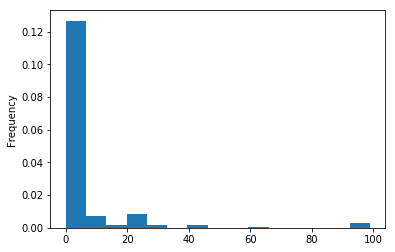

In [9]:
# Freqeuncy plot for cigarettes_per_day
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

d = df_smoking1['cigarettes_per_day']
plt.hist(df_smoking1['cigarettes_per_day'], normed=True, bins=15)
plt.ylabel('Frequency');

In [10]:
# Drop rows where cigarettes_per_day = 0
df_smoking1['cigarettes_per_day'] =  df_smoking1['cigarettes_per_day'].replace ({np.NaN: 0})
df_smoking1 = df_smoking1[df_smoking1['cigarettes_per_day'] > 0]
df_smoking1.shape

(7602, 92)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


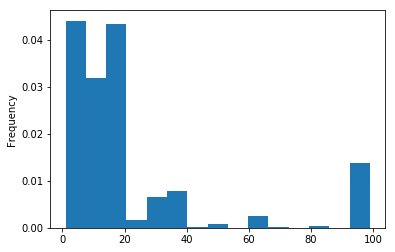

In [11]:
# Create frequency plot of cigarettes per day
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

d = df_smoking1['cigarettes_per_day']
plt.hist(df_smoking1['cigarettes_per_day'], normed=True, bins=15)
plt.ylabel('Frequency');

In [12]:
# Create a column in which cigarettes per day are sorted into 8 bins
df_smoking1['cigarettes_per_day_bins'] = pd.cut(x=df_smoking1['cigarettes_per_day'], bins=[0, 7, 14, 21, 28, 35, 42, 49, 100], labels=[1, 2, 3, 4, 5, 6, 7, 8])
df_smoking1 = df_smoking1.drop('cigarettes_per_day', axis = 1)
df_smoking1['cigarettes_per_day_bins'] =  df_smoking1['cigarettes_per_day_bins'].replace ({np.NaN: 0})
df_smoking1.head()

,language,cereal_serve_per_month,cereal_times_per_month,more_than_one_cereal_type,milk_serve_per_month,milk_times_per_month,milk_type,soda_serve_per_month,soda_times_per_month,juice_serve_per_month,juice_times_per_month,coffee_serve_per_month,coffee_times_per_month,sports_drink_serve_per_month,sports_drink_times_per_month,fruit_drink_serve_per_month,fruit_drink_times_per_month,fruit_eat_serve_per_month,fruit_eat_times_per_month,salad_eat_serve_per_month,salad_eat_times_per_month,fries_eat_serve_per_month,fries_eat_times_per_month,potatoe_eat_serve_per_month,potatoe_eat_times_per_month,beans_eat_serve_per_month,beans_eat_times_per_month,grains_eat_serve_per_month,grains_eat_times_per_month,vegies_eat_serve_per_month,vegies_eat_times_per_month,salsa_eat_serve_per_month,salsa_eat_times_per_month,pizza_eat_serve_per_month,pizza_eat_times_per_month,tomatoe_eat_serve_per_month,tomatoe_eat_times_per_month,cheese_eat_serve_per_month,cheese_eat_times_per_month,red_meat_eat_serve_per_month,...,ice_cream_eat_times_per_month,pop_corn_eat_serve_per_month,pop_corn_eat_times_per_month,vitamin_past_month,multivitamin_past_month,multivitamin_days_in_month,calcium_past_month,calcium_days_in_month,vitD_past_month,vitD_days_in_month,vitD_reason,1st_kind_cereal_eaten,2nd_kind_cereal_eaten,walk_past_wk,walk_number_wk,single_walk_distance,single_walk_time,walk_leisure_past_wk,walk_leisure_number_wk,walk_leisure_ distance,walk_leisure_ time,see_walking_from_home,weather_discourages_walk,walkway_existence,walkable_retail,walkable_bus_stop,walkable_entertainment,walkable_relaxation,streets_have_walkways,traffic_discourages_walking,crime_discourages_walking,animals_discourage_walking,cigarette_even_once,cigar_even_once,pipe_even_once,smokeless_even_once,had_genetic_counseling,genetic_counseling_with_MD,genetic_counseling_for_cancer,cigarettes_per_day_bins
4,5,2,2,1.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,3,2,3,3,3,0,0,1,1,1,3,3,3,4,3,6,2,1,...,3,0,0,1,1.0,30.0,0.0,0.0,0.0,0.0,0.0,307.0,32.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,2
9,1,3,2,0.0,1,1,1.0,3,3,0,0,1,1,0,0,4,2,2,2,0,0,1,3,1,2,5,2,0,0,2,2,1,3,1,3,2,2,2,2,2,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,327.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1
11,5,0,0,0.0,0,0,0.0,1,2,0,0,1,1,0,0,2,2,2,3,1,2,1,2,1,2,1,2,0,0,3,2,0,0,0,0,1,3,2,3,2,...,3,1,3,1,1.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,1,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,2
13,5,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,10,3,0,0,0,0,20,3,4,3,3,3,2,1,5,3,0,0,0,0,2,3,20,...,0,0,0,1,0.0,0.0,0.0,0.0,1.0,30.0,4.0,0.0,0.0,1,5.0,40.0,1.0,1.0,3.0,90.0,1.0,1,3,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,1,1
14,2,0,0,0.0,0,0,0.0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,2,1,2,2,2,4,1,1,1,0,0,0,0,1,2,3,2,15,...,1,1,2,1,1.0,30.0,1.0,30.0,1.0,30.0,2.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Frequency')

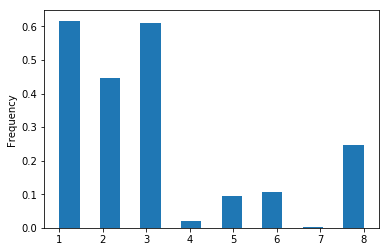

In [13]:
# Looking at the frequency distribution of cigarettes per day bins
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

d_bin = df_smoking1['cigarettes_per_day_bins']
plt.hist(d_bin, normed=True, bins=15)
plt.ylabel('Frequency')

In [14]:
# Train/validate split: random 80/20% train/validate split.
from sklearn.model_selection import train_test_split
XTrain, XVal, yTrain, yVal = train_test_split(df_smoking1.drop('cigarettes_per_day_bins', axis = 1), df_smoking1['cigarettes_per_day_bins'], test_size = 0.2, random_state = 42)

XTrain.shape, yTrain.shape, XVal.shape, yVal.shape

((6081, 91), (6081,), (1521, 91), (1521,))

In [15]:
# Look at correlation coefficients
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
XTrain.corr()

,language,cereal_serve_per_month,cereal_times_per_month,more_than_one_cereal_type,milk_serve_per_month,milk_times_per_month,milk_type,soda_serve_per_month,soda_times_per_month,juice_serve_per_month,juice_times_per_month,coffee_serve_per_month,coffee_times_per_month,sports_drink_serve_per_month,sports_drink_times_per_month,fruit_drink_serve_per_month,fruit_drink_times_per_month,fruit_eat_serve_per_month,fruit_eat_times_per_month,salad_eat_serve_per_month,salad_eat_times_per_month,fries_eat_serve_per_month,fries_eat_times_per_month,potatoe_eat_serve_per_month,potatoe_eat_times_per_month,beans_eat_serve_per_month,beans_eat_times_per_month,grains_eat_serve_per_month,grains_eat_times_per_month,vegies_eat_serve_per_month,vegies_eat_times_per_month,salsa_eat_serve_per_month,salsa_eat_times_per_month,pizza_eat_serve_per_month,pizza_eat_times_per_month,tomatoe_eat_serve_per_month,tomatoe_eat_times_per_month,cheese_eat_serve_per_month,cheese_eat_times_per_month,red_meat_eat_serve_per_month,red_meat_eat_times_per_month,processed_meat_eat_serve_per_month,processed_meat_eat_times_per_month,bread_eat_serve_per_month,bread_eat_times_per_month,candy_eat_serve_per_month,candy_eat_times_per_month,donut_eat_serve_per_month,donut_eat_times_per_month,cookie_eat_serve_per_month,cookie_eat_times_per_month,ice_cream_eat_serve_per_month,ice_cream_eat_times_per_month,pop_corn_eat_serve_per_month,pop_corn_eat_times_per_month,vitamin_past_month,multivitamin_past_month,multivitamin_days_in_month,calcium_past_month,calcium_days_in_month,vitD_past_month,vitD_days_in_month,vitD_reason,1st_kind_cereal_eaten,2nd_kind_cereal_eaten,walk_past_wk,walk_number_wk,single_walk_distance,single_walk_time,walk_leisure_past_wk,walk_leisure_number_wk,walk_leisure_ distance,walk_leisure_ time,see_walking_from_home,weather_discourages_walk,walkway_existence,walkable_retail,walkable_bus_stop,walkable_entertainment,walkable_relaxation,streets_have_walkways,traffic_discourages_walking,crime_discourages_walking,animals_discourage_walking,cigarette_even_once,cigar_even_once,pipe_even_once,smokeless_even_once,had_genetic_counseling,genetic_counseling_with_MD,genetic_counseling_for_cancer
language,1.000000,0.436982,0.351576,-0.035361,0.433675,0.349838,-0.096036,0.431958,0.342304,0.428804,0.332304,0.426747,0.333119,0.432197,0.359200,0.431355,0.358626,0.425964,0.384347,0.427673,0.382662,0.425416,0.361141,0.422435,0.375218,0.421520,0.334060,0.422670,0.352108,0.415677,0.359752,0.421930,0.332938,0.422585,0.358019,0.418889,0.360487,0.417031,0.363737,0.419657,0.376608,0.418972,0.373554,0.417267,0.339279,0.411998,0.372756,0.416284,0.334741,0.409480,0.355908,0.414443,0.350857,0.415217,0.354492,-0.050629,-0.037872,-0.029406,-0.040267,-0.034379,-0.016192,-0.013972,-0.011984,-0.066491,-0.021112,-0.100718,-0.049873,-0.015167,-0.075258,-0.077325,-0.026543,-0.026035,-0.061651,0.322965,0.214795,-0.203418,-0.159764,-0.188837,-0.150265,-0.141028,-0.188904,-0.093775,-0.096958,-0.069518,-0.014661,0.017100,0.021861,0.036964,-0.011091,-0.021622,-0.015048
cereal_serve_per_month,0.436982,1.000000,0.760684,-0.138573,0.972695,0.769347,-0.232121,0.959336,0.734191,0.956040,0.727421,0.951691,0.801064,0.957457,0.808602,0.952001,0.798001,0.957833,0.806646,0.950363,0.789765,0.950622,0.706499,0.936681,0.743602,0.935026,0.704172,0.940141,0.698946,0.928090,0.801514,0.932706,0.678452,0.938145,0.679303,0.930008,0.700663,0.926477,0.769202,0.929806,0.780559,0.928255,0.707912,0.923150,0.735331,0.922073,0.707072,0.926723,0.680731,0.912101,0.682247,0.918537,0.677407,0.921843,0.669004,-0.243404,-0.162842,-0.150437,-0.096730,-0.086469,-0.122617,-0.111407,-0.099275,-0.213615,-0.118378,-0.114823,-0.039521,-0.034909,-0.097345,-0.188538,-0.105001,-0.067584,-0.163052,0.612504,0.481079,-0.385381,-0.199678,-0.181334,-0.176244,-0.274859,-0.217642,-0.097254,-0.069252,-0.061819,-0.082766,-0.156603,-0.104214,-0.087348,-0.026606,-0.039074,-0.023971
cereal_times_per_month,0.351576,0.760684,1.000000,0.103886,0.735602,0.739144,-0.007578,0.

In [16]:
# Dropping highly corrlated columns
def correlation(dataset, validation_dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
                    del validation_dataset[colname] # deleting the column from the validation dataset
    
correlation(XTrain, XVal, 0.98)

XTrain.shape
XVal.shape

(1521, 78)

In [17]:
# Begin with baselines for classification. 
# The baseline accuracy, if the majority class is guessed for every prediction?
# option with pandas function:
yTrain.value_counts(normalize=True)

3    0.286466
1    0.285644
2    0.208847
8    0.113633
6    0.049663
5    0.044565
4    0.009702
7    0.001480
Name: cigarettes_per_day_bins, dtype: float64

In [18]:
# option with scikit-learn function
from sklearn.metrics import accuracy_score
y = yTrain
majority_class = y.mode()[0]
y_pred = [majority_class] * len(y)
accuracy_score(y, y_pred)

0.2864660417694458

In [0]:
# Thus, baseline accuracy, if you guessed the majority class for every prediction is 0.286

In [20]:
# Use a scikit-learn pipeline to encode categoricals and fit a Random Forest Classifier model.

X_train = XTrain
y_train = yTrain
X_val = XVal
y_val = yVal

from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

# Get the model's validation accuracy
ce.OneHotEncoder(use_cat_names=True),
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.3438527284681131


In [21]:
# Use a scikit-learn pipeline to encode categoricals and 
# fit a Random Forest Classifier model with class weights.

X_train = XTrain
y_train = yTrain
X_val = XVal
y_val = yVal

from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1, class_weight = {1:40, 2:1, 3:54, 4:1, 5:1, 6:1, 7:6})
)

pipeline.fit(X_train, y_train)

# Get the model's validation accuracy
ce.OneHotEncoder(use_cat_names=True),
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.3537146614069691


In [22]:
# Use a scikit-learn pipeline to encode categoricals and 
# fit a Random Forest Classifier model with class weights
# and min_samples_leaf = 15.

X_train = XTrain
y_train = yTrain
X_val = XVal
y_val = yVal

from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1, class_weight = {1:40, 2:1, 3:54, 4:1, 5:1, 6:1, 7:6}, min_samples_leaf = 15)
)

pipeline.fit(X_train, y_train)

# Get the model's validation accuracy
ce.OneHotEncoder(use_cat_names=True),
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.378698224852071


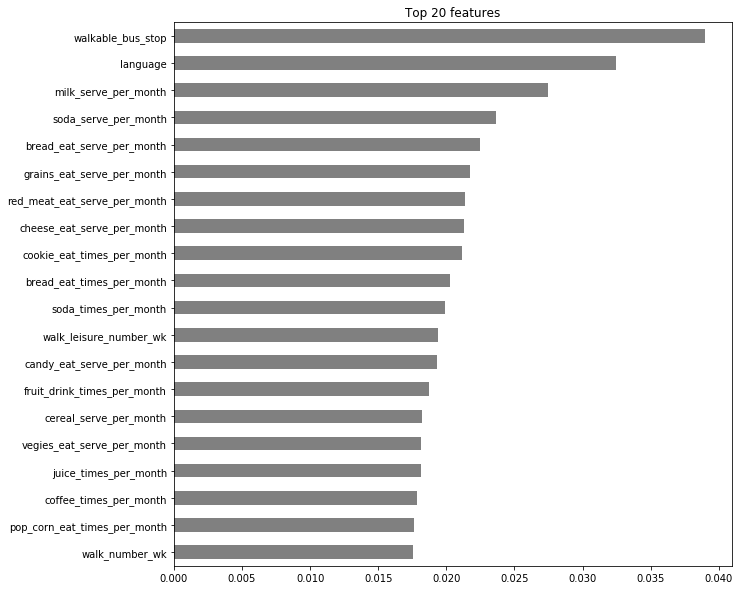

In [23]:
# Plot of features
%matplotlib inline
import matplotlib.pyplot as plt
# Get feature importances
encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_train)
rf = pipeline.named_steps['randomforestclassifier']
importances1 = pd.Series(rf.feature_importances_, encoded.columns)
# Plot feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances1.sort_values()[-n:].plot.barh(color='grey');

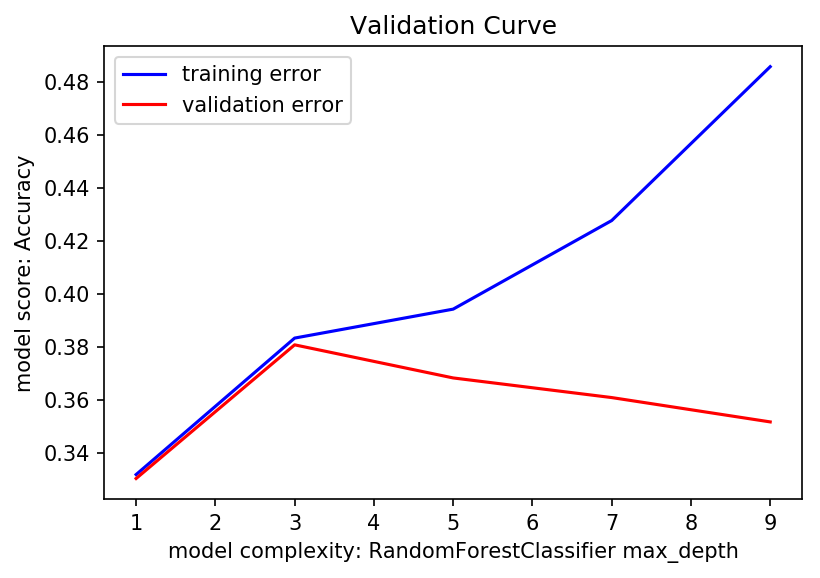

In [24]:
# Generate validation curves
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier()
)

depth = range(1, 10, 2)
train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train,
    param_name='decisiontreeclassifier__max_depth',
    param_range=depth, scoring='accuracy',
    cv=3,
    n_jobs=-1
)
    
plt.figure(dpi=150)
plt.plot(depth, np.mean(train_scores, axis=1), color='blue', label='training error')
plt.plot(depth, np.mean(val_scores, axis=1), color='red', label='validation error')
plt.title('Validation Curve')
plt.xlabel('model complexity: RandomForestClassifier max_depth')
plt.ylabel('model score: Accuracy')
plt.legend();

In [25]:
# Tuning the hyper-parameters for a Random Forrest Classifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=5)
)

param_distributions = {'simpleimputer__strategy': ['mean', 'median', 'most_frequent'], 'randomforestclassifier__n_estimators': randint(50, 500), 'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 'randomforestclassifier__max_features': uniform(0, 1), }
search = RandomizedSearchCV( pipeline, param_distributions=param_distributions, n_iter=10, cv=3, scoring='accuracy', verbose=10, return_train_score=True, n_jobs=2 )

search.fit(X_train, y_train);

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   13.6s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   25.7s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:   51.2s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  1.1min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:  2.5min finished


In [26]:
from sklearn.model_selection import cross_val_score
k = 3
scores = cross_val_score(pipeline, X_val, y_val, cv=k, 
scoring='accuracy')
print(f'Validation Accuracy for {k} folds:', scores);

Validation Accuracy for 3 folds: [0.29803922 0.34122288 0.29563492]


In [27]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation Accuracy', search.best_score_)

Best hyperparameters {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.8408236185421043, 'randomforestclassifier__n_estimators': 396, 'simpleimputer__strategy': 'most_frequent'}
Cross-validation Accuracy 0.39483637559611906


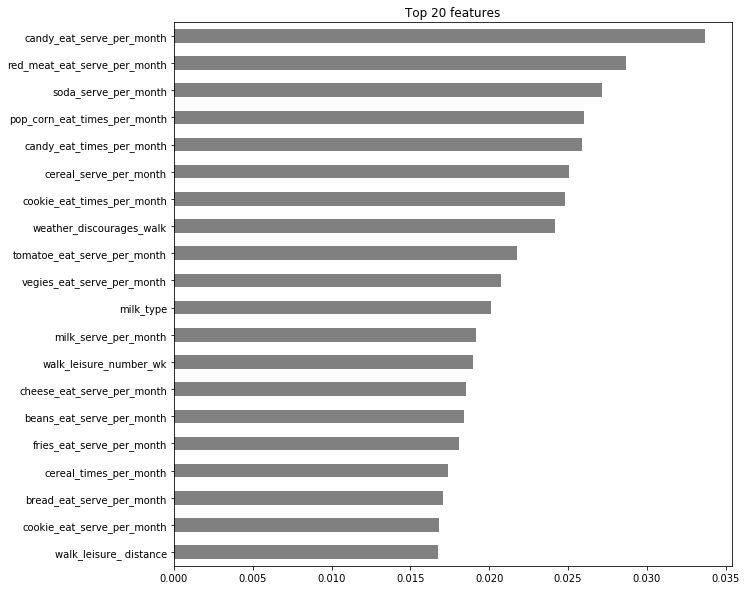

In [28]:
pipeline.fit(X_val, y_val)
# Plot of features
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_val)
rf = pipeline.named_steps['randomforestclassifier']
importances2 = pd.Series(rf.feature_importances_, encoded.columns)

# Plot feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances2.sort_values()[-n:].plot.barh(color='grey');

In [29]:
# Demonstrate the relatively high cardinatlity of candy_eat_times_per_month 

XTrain['candy_eat_times_per_month'].value_counts()

3    1889
2    1744
0    1417
1     729
8     252
7      32
9      18
Name: candy_eat_times_per_month, dtype: int64

In [30]:
# Get drop-column importances
column = 'candy_eat_times_per_month'

# # Fit without column
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy = 'median'),
    RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=152, max_depth = 10, max_features = 0.14621091571560108)
)

pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy = 'median'),
    RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=152, max_depth = 10, max_features = 0.14621091571560108)
)

pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without candy_eat_times_per_month: 0.40039447731755423
Validation Accuracy with candy_eat_times_per_month: 0.3905325443786982
Drop-Column Importance for candy_eat_times_per_month: -0.00986193293885601


In [31]:
# Rerun the permutation importance process, but for a different feature
feature = 'language'
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])
score_permuted = pipeline.score(X_val_permuted, y_val)

print(f'Validation Accuracy without {feature} permuted: {score_permuted}')
print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy without language permuted: 0.37343852728468113
Validation Accuracy with language: 0.3905325443786982
Permutation Importance: 0.01709401709401709


In [32]:
# Using Eli5 library which does not work with pipelines
transformers = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=152, max_depth = 10, max_features = 0.14621091571560108)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=0.14621091571560108,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=152, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [33]:
# Get permutation importances
! pip install eli5
from eli5.sklearn import PermutationImportance
import eli5

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=2,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter,
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

     |████████████████████████████████| 112kB 2.8MB/s 


Using TensorFlow backend.


Weight,Feature
0.0141 ± 0.0059,language
0.0046 ± 0.0039,processed_meat_eat_times_per_month
0.0046 ± 0.0092,coffee_times_per_month
0.0039 ± 0.0013,cookie_eat_serve_per_month
0.0030 ± 0.0007,donut_eat_times_per_month
0.0026 ± 0.0013,cigar_even_once
0.0020 ± 0.0053,sports_drink_times_per_month
0.0016 ± 0.0059,cookie_eat_times_per_month
0.0013 ± 0.0026,vegies_eat_times_per_month
0.0013 ± 0.0000,genetic_counseling_for_cancer


In [34]:
# Thus, language is way more important according to feature permutation than according to feature importance in the Random Forrest model
# Use importances for feature selection
print('Shape before removing features:', X_train.shape)

Shape before removing features: (6081, 78)


In [35]:
# Remove features of 0 importance
zero_importance = 0.0003
mask = abs(permuter.feature_importances_) > zero_importance
features = X_train.columns[mask]
X_train = X_train[features]
print('Shape after removing features:', X_train.shape)

Shape after removing features: (6081, 72)


In [36]:
X_val = X_val[features]

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy = 'median'),
    RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=152, max_depth = 10, max_features = 0.14621091571560108)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.40039447731755423


In [37]:
# Gradient boosting using XGboost with 45 estimators
from xgboost import XGBClassifier
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=45, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.4069690992767916


In [0]:
# Validation Accuracy History
# 0.2864660417694458– baseline guessing the majority class
# 0.3438527284681131– initial fit
# 0.3537146614069691- with class weights
# 0.3786982248520710- with class weights and min_samples_leaf = 15
# 0.3938496957737214– from cross validation
# 0.3905325443786982– doing permutation importance
# 0.4003944773175542– after removing features of zero importance
# 0.4069690992767916- from gradient boosting

In [39]:
# XGboost has given us the best axcuracy yet

# Gradient boosting using XGboost with 1000 estimators
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_train.shape, X_val.shape, X_train_encoded.shape, X_val_encoded.shape

((6081, 72), (1521, 72), (6081, 72), (1521, 72))

In [40]:
eval_set = [(X_train_encoded, y_train),
            (X_val_encoded, y_val)]

model = XGBClassifier(          
    n_estimators=1000, # <= 1000 trees, depends on early stopping
    max_depth=7, # try deeper trees because of high cardinality categoricals
    learning_rate=0.1, # try higher learning rate
    n_jobs=-1
)

model.fit(X_train_encoded, y_train, eval_set=eval_set, eval_metric='merror',
    early_stopping_rounds=50)

[0]	validation_0-merror:0.544483	validation_1-merror:0.634451
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.525078	validation_1-merror:0.623932
[2]	validation_0-merror:0.503371	validation_1-merror:0.621302
[3]	validation_0-merror:0.494491	validation_1-merror:0.625247
[4]	validation_0-merror:0.487749	validation_1-merror:0.616042
[5]	validation_0-merror:0.476402	validation_1-merror:0.618672
[6]	validation_0-merror:0.463082	validation_1-merror:0.614727
[7]	validation_0-merror:0.455024	validation_1-merror:0.614727
[8]	validation_0-merror:0.450584	validation_1-merror:0.612755
[9]	validation_0-merror:0.444335	validation_1-merror:0.618014
[10]	validation_0-merror:0.437593	validation_1-merror:0.612755
[11]	validation_0-merror:0.43233	validation_1-merror:0.6167
[12]	validation_0-merror:0.428712	validation_1-merror:0.612097
[13]	validation_0-merror:0.4221

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

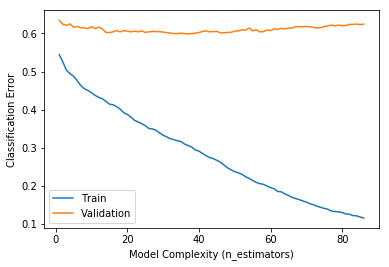

In [41]:
# Plot the results
results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
# plt.ylim((0.18, 0.22)) # Zoom in
plt.legend();

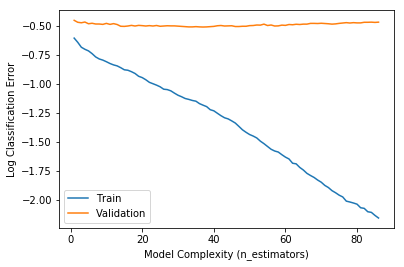

In [42]:
# Plot log classification error versus model complexity
import numpy as np
results = model.evals_result()
log_train_error = np.log(results['validation_0']['merror'])
log_val_error = np.log(results['validation_1']['merror'])
epoch = range(1, len(train_error)+1)
plt.plot(epoch, log_train_error, label='Train')
plt.plot(epoch, log_val_error, label='Validation')
plt.ylabel('Log Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
# plt.ylim((0.18, 0.22)) # Zoom in
plt.legend();

In [43]:
#Gradient Boosting R^2
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=46, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Gradient Boosting R^2 0.2793766979819796


In [44]:
# Getting the value distribution for the language feature
df_smoking1['language'].value_counts()

5    5713
4    1031
8     213
3     203
1     169
2     138
6     134
9       1
Name: language, dtype: int64

In [0]:
# Define function to vary the language feature while holding all other features constant
import numpy as np

def vary_language(model, example):
    print('Vary language, hold other features constant', '\n')
    example = example.copy()
    preds = []
    for lang in range(1, 9, 1):
        example['language'] = lang
        pred = model.predict(example)[0]
        print(f'Predicted cigarettes_per_day_bin: {pred:.3f}%')
        print(example.to_string(), '\n')
        preds.append(pred)
    print('Difference between predictions')
    print(np.diff(preds))

In [46]:
# Vary the language feature while holding all other features constant for the first row
example = X_val.iloc[[0]]
vary_language(gb, example)

Vary language, hold other features constant 

Predicted cigarettes_per_day_bin: 3.033%
       language  cereal_serve_per_month  cereal_times_per_month  more_than_one_cereal_type  milk_serve_per_month  milk_times_per_month  milk_type  soda_serve_per_month  soda_times_per_month  juice_times_per_month  coffee_times_per_month  sports_drink_times_per_month  fruit_drink_times_per_month  salad_eat_times_per_month  fries_eat_serve_per_month  fries_eat_times_per_month  potatoe_eat_times_per_month  beans_eat_serve_per_month  beans_eat_times_per_month  grains_eat_serve_per_month  grains_eat_times_per_month  vegies_eat_serve_per_month  vegies_eat_times_per_month  tomatoe_eat_serve_per_month  tomatoe_eat_times_per_month  cheese_eat_serve_per_month  cheese_eat_times_per_month  red_meat_eat_serve_per_month  red_meat_eat_times_per_month  processed_meat_eat_times_per_month  bread_eat_serve_per_month  bread_eat_times_per_month  candy_eat_serve_per_month  candy_eat_times_per_month  donut_eat_times_per_mo

In [47]:
# Vary the language feature while holding all other features constant for the second row
example2 = X_val.iloc[[2]]
vary_language(gb, example2)

Vary language, hold other features constant 

Predicted cigarettes_per_day_bin: 2.657%
       language  cereal_serve_per_month  cereal_times_per_month  more_than_one_cereal_type  milk_serve_per_month  milk_times_per_month  milk_type  soda_serve_per_month  soda_times_per_month  juice_times_per_month  coffee_times_per_month  sports_drink_times_per_month  fruit_drink_times_per_month  salad_eat_times_per_month  fries_eat_serve_per_month  fries_eat_times_per_month  potatoe_eat_times_per_month  beans_eat_serve_per_month  beans_eat_times_per_month  grains_eat_serve_per_month  grains_eat_times_per_month  vegies_eat_serve_per_month  vegies_eat_times_per_month  tomatoe_eat_serve_per_month  tomatoe_eat_times_per_month  cheese_eat_serve_per_month  cheese_eat_times_per_month  red_meat_eat_serve_per_month  red_meat_eat_times_per_month  processed_meat_eat_times_per_month  bread_eat_serve_per_month  bread_eat_times_per_month  candy_eat_serve_per_month  candy_eat_times_per_month  donut_eat_times_per_mo

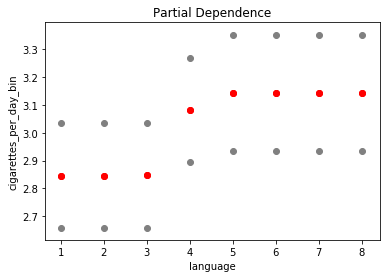

In [48]:
# Plot pair dependency of the language feature for rows 1 and 2 
%matplotlib inline
import matplotlib.pyplot as plt

examples = pd.concat([example, example2])
for lang in range(1, 9, 1):
    examples['language'] = lang
    preds = gb.predict(examples)
    for pred in preds:
        plt.scatter(lang, pred, color='grey')
        plt.scatter(lang, np.mean(preds), color='red')
    plt.title('Partial Dependence')
    plt.xlabel('language')
    plt.ylabel('cigarettes_per_day_bin')

     |████████████████████████████████| 57.7MB 45.6MB/s 
  Created wheel for PDPbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=39cb909c3248d053824e97a9d1ea333395f0568db42d0dbb294effd49d3178e5
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built PDPbox


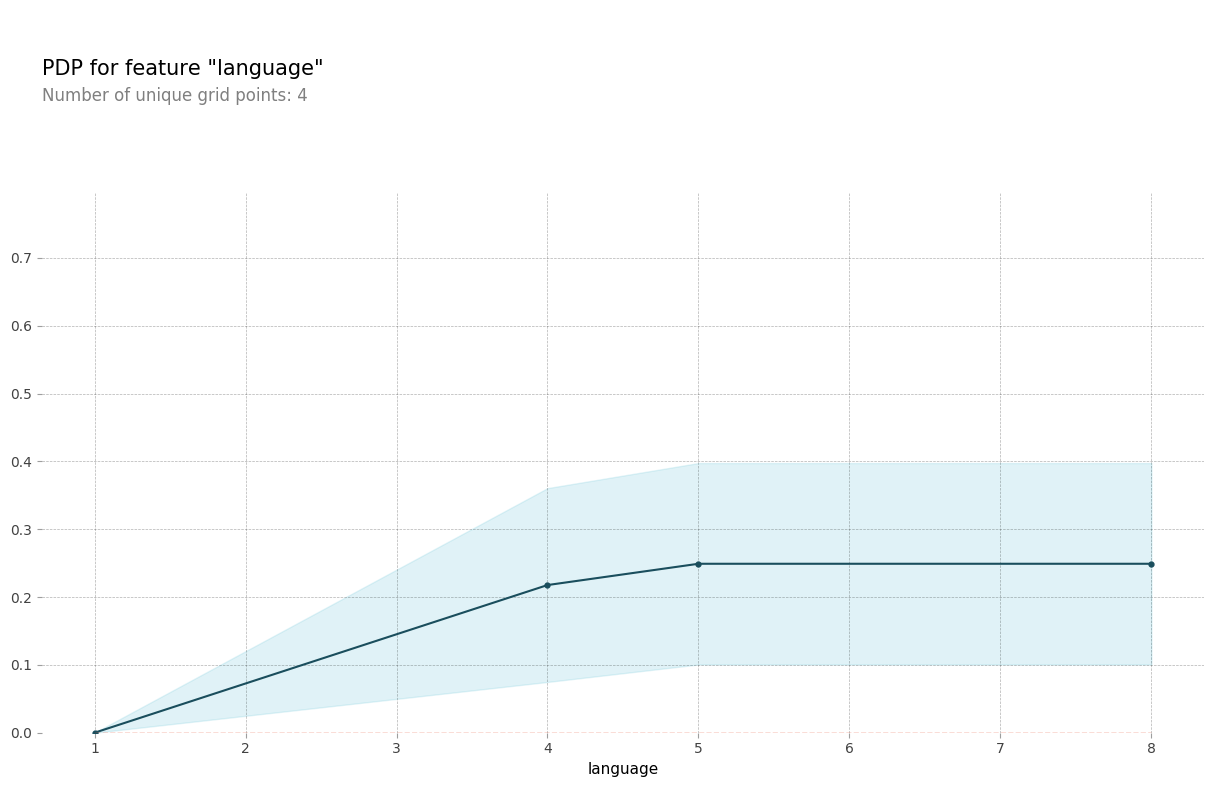

In [49]:
# Create patrial dependence plots with one feature
import matplotlib.pyplot as plt
! pip install PDPbox

# First for the language feature
plt.rcParams['figure.dpi'] = 100
from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'language'
isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

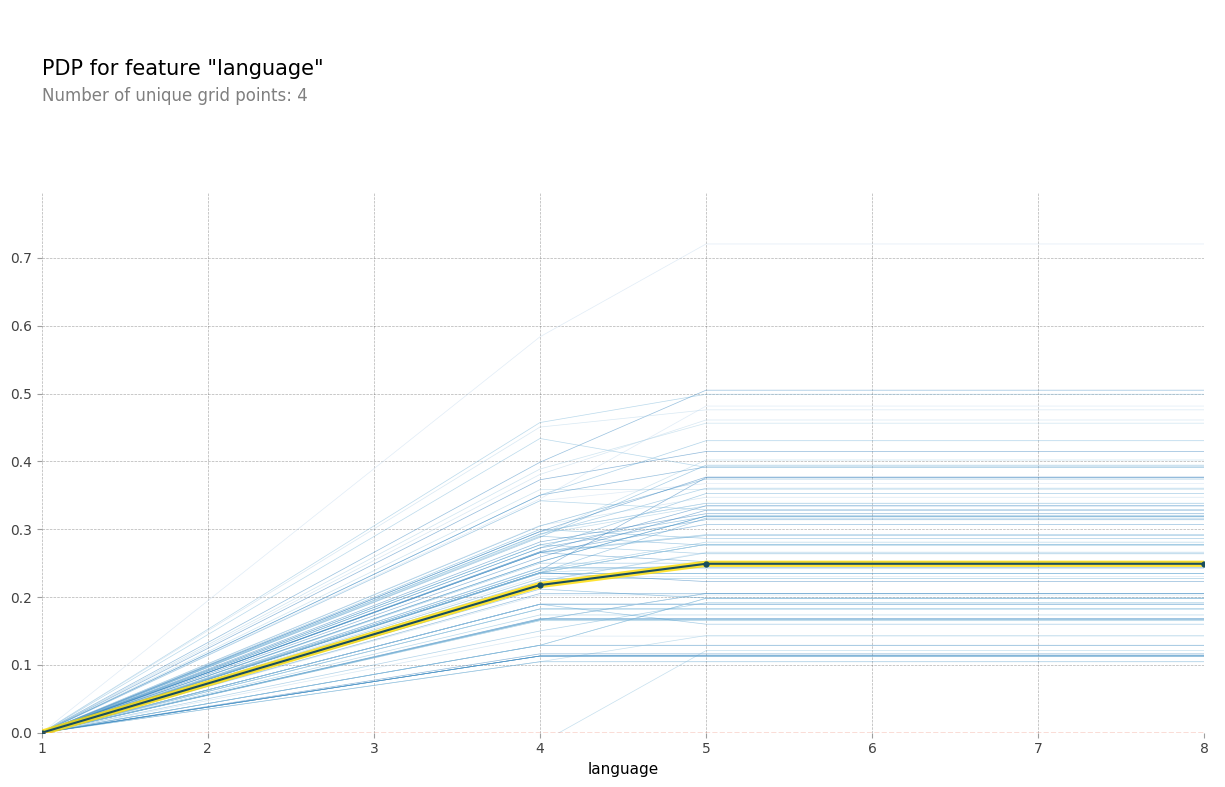

In [50]:
# Plot partial dependence plot with ICE lines for the language feature
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100) # Plot 100 ICE lines
plt.xlim(1,8);

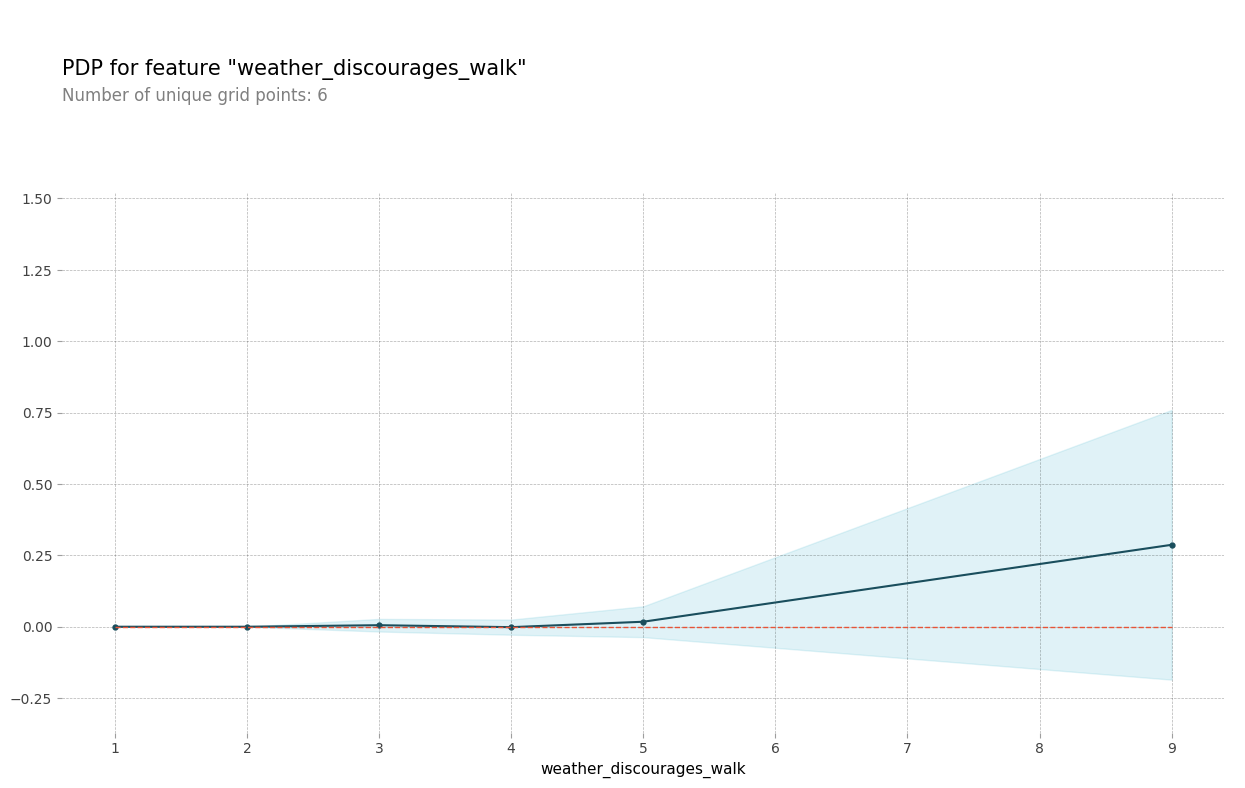

In [51]:
# First for the weather_discourages_walk feature
plt.rcParams['figure.dpi'] = 100
from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'weather_discourages_walk'
isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

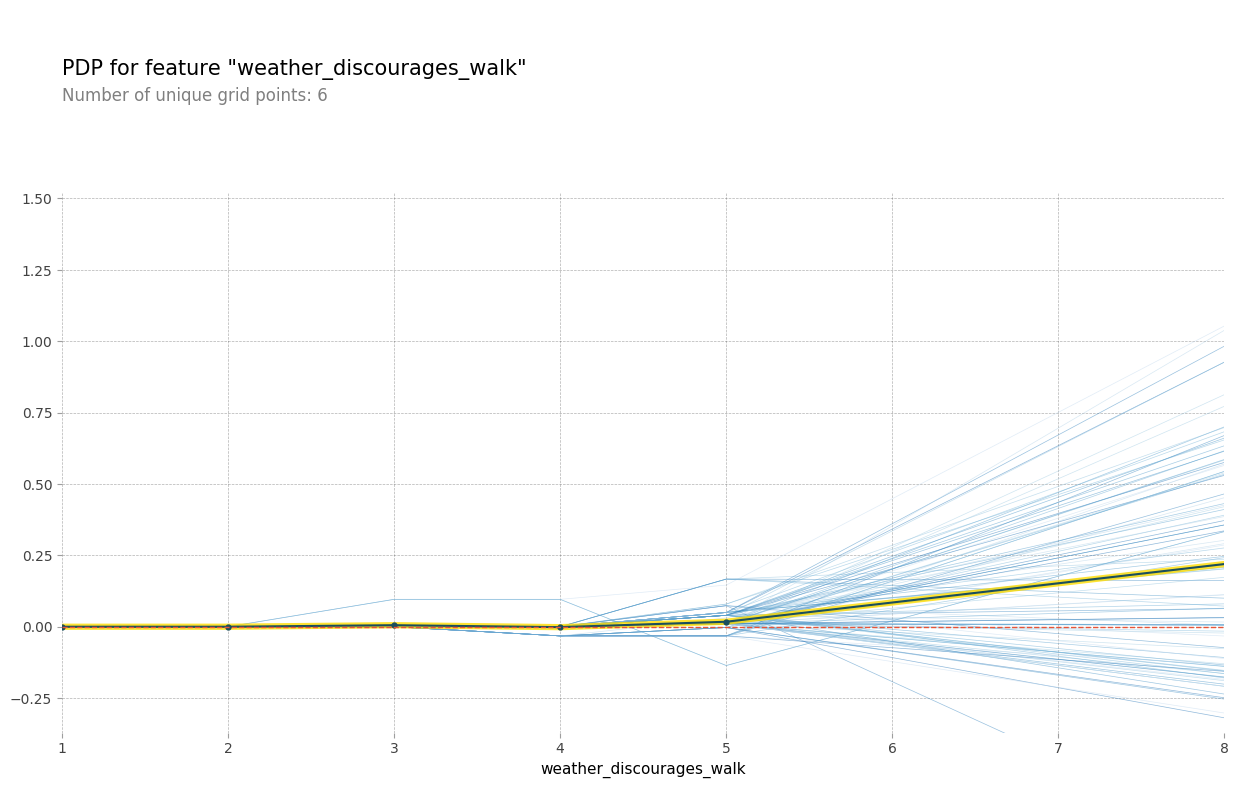

In [52]:
# Plot partial dependence plot with ICE lines for the weather_discourages_walk feature
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100) # Plot 100 ICE lines
plt.xlim(1,8);

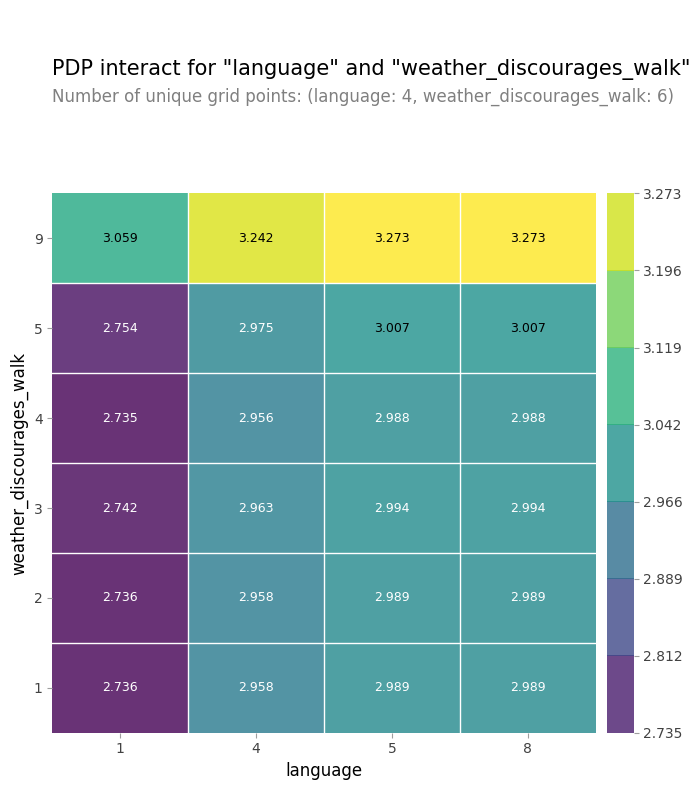

In [53]:
# Partial Dependence Plots with 2 features
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['language', 'weather_discourages_walk']
interaction = pdp_interact(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [54]:
# A two feature partical dependence plot in 3D
pdp = interaction.pdp.pivot_table(
    values='preds',
    columns=features[0],
    index=features[1]
)[::-1] # Slice notation to reverse index order so y axis is ascending

import plotly.graph_objs as go

target = 'cigarettes_per_day_bins'

surface = go.Surface(x=pdp.columns,
                     y=pdp.index,
                     z=pdp.values)

layout = go.Layout(
    scene=dict(
    xaxis=dict(title=features[0]),
    yaxis=dict(title=features[1]),
    zaxis=dict(title=target)
    )
)
fig = go.Figure(surface, layout)
fig.show()

In [0]:
# Test ROC AUC
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
import category_encoders as ce

processor = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_val_processed = processor.fit_transform(X_val)
# y_pred_proba = model.predict_proba(X_val_processed)[:, 1]
# print('Test ROC AUC:', roc_auc_score(y_val, y_pred_proba)) # Ranges from 0-1, higher is better

In [56]:
# Contributrions to making bin 1 (1 - 7 cigarettes per day) for sample 170
! pip install shap==0.23.0
! pip install -I shap

import shap

row = X_val.iloc[[170]]

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values_input = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0],
    shap_values=shap_values_input[0],
    features=row
)

     |████████████████████████████████| 184kB 2.9MB/s 
  Created wheel for shap: filename=shap-0.23.0-cp36-cp36m-linux_x86_64.whl size=235669 sha256=2ea6f63613af0bf885425572acaca8dff2336d1c2a239e85910b2868b6d96b9d
  Stored in directory: /root/.cache/pip/wheels/c1/2c/aa/10d1782fe066536fcd564a2f8adea4dd05f57768236038855b
Successfully built shap
     |████████████████████████████████| 245kB 2.9MB/s 
     |████████████████████████████████| 20.4MB 711kB/s 
     |████████████████████████████████| 25.2MB 1.2MB/s 
     |████████████████████████████████| 6.7MB 38.2MB/s 
     |████████████████████████████████| 13.1MB 43.9MB/s 
     |████████████████████████████████| 10.5MB 34.6MB/s 
     |████████████████████████████████| 61kB 26.7MB/s 
     |████████████████████████████████| 778kB 44.5MB/s 
     |████████████████████████████████| 26.5MB 1.3MB/s 
     |████████████████████████████████| 296kB 48.8MB/s 
     |████████████████████████████████| 235kB 46.5MB/s 
     |████████████████████████████████|

In [57]:
# Contributrions to making bin 8 (49 - 100 cigarettes per day) for sample 170
import shap

row = X_val.iloc[[170]]

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values_input = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[7],
    shap_values=shap_values_input[7],
    features=row
)

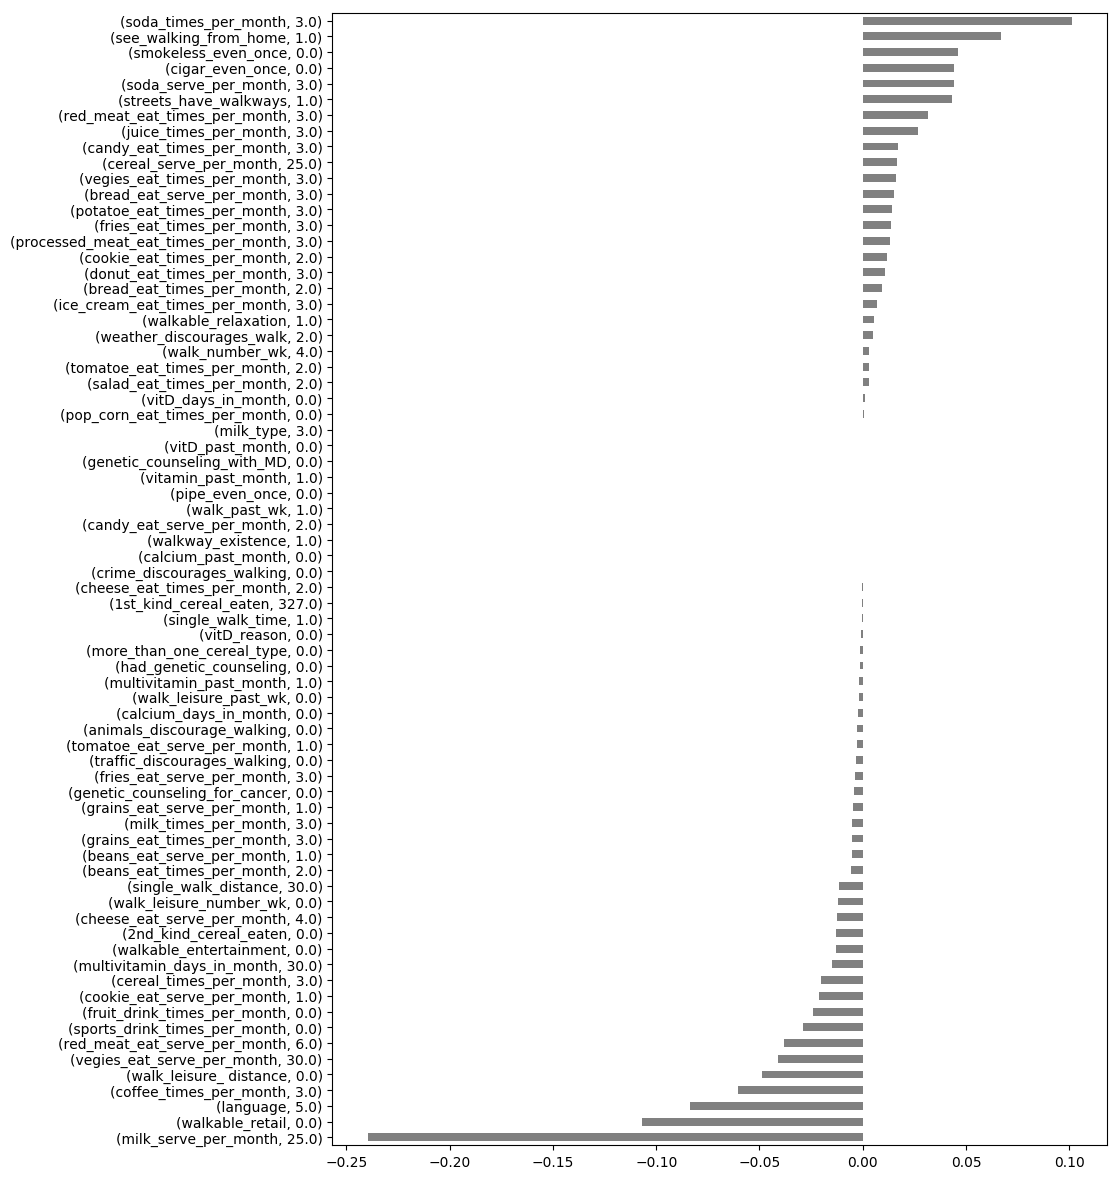

In [58]:
# Featues importances for sample 170

feature_names = row.columns
feature_values = row.values[0]
shap_values_array = np.asarray(shap_values_input)
shaps = pd.Series(shap_values_array[0,0,:], zip(feature_names, feature_values))
shaps.sort_values().plot.barh(color='grey', figsize=(10,15));

In [59]:
# Create a dataframe for sample 170
# bin versus feature

my_python_list = [shap_values_array[0, 0, :], shap_values_array[1, 0, :], shap_values_array[2, 0, :], shap_values_array[3, 0, :], shap_values_array[4, 0, :], shap_values_array[5, 0, :], shap_values_array[6, 0, :], shap_values_array[7, 0, :]]
df_bins = pd.DataFrame(columns=np.array(feature_names), data=my_python_list)

df_bins.head(8)

,language,cereal_serve_per_month,cereal_times_per_month,more_than_one_cereal_type,milk_serve_per_month,milk_times_per_month,milk_type,soda_serve_per_month,soda_times_per_month,juice_times_per_month,coffee_times_per_month,sports_drink_times_per_month,fruit_drink_times_per_month,salad_eat_times_per_month,fries_eat_serve_per_month,fries_eat_times_per_month,potatoe_eat_times_per_month,beans_eat_serve_per_month,beans_eat_times_per_month,grains_eat_serve_per_month,grains_eat_times_per_month,vegies_eat_serve_per_month,vegies_eat_times_per_month,tomatoe_eat_serve_per_month,tomatoe_eat_times_per_month,cheese_eat_serve_per_month,cheese_eat_times_per_month,red_meat_eat_serve_per_month,red_meat_eat_times_per_month,processed_meat_eat_times_per_month,bread_eat_serve_per_month,bread_eat_times_per_month,candy_eat_serve_per_month,candy_eat_times_per_month,donut_eat_times_per_month,cookie_eat_serve_per_month,cookie_eat_times_per_month,ice_cream_eat_times_per_month,pop_corn_eat_times_per_month,vitamin_past_month,multivitamin_past_month,multivitamin_days_in_month,calcium_past_month,calcium_days_in_month,vitD_past_month,vitD_days_in_month,vitD_reason,1st_kind_cereal_eaten,2nd_kind_cereal_eaten,walk_past_wk,walk_number_wk,single_walk_distance,single_walk_time,walk_leisure_past_wk,walk_leisure_number_wk,walk_leisure_ distance,see_walking_from_home,weather_discourages_walk,walkway_existence,walkable_retail,walkable_entertainment,walkable_relaxation,streets_have_walkways,traffic_discourages_walking,crime_discourages_walking,animals_discourage_walking,cigar_even_once,pipe_even_once,smokeless_even_once,had_genetic_counseling,genetic_counseling_with_MD,genetic_counseling_for_cancer
0,-0.083764,0.016607,-2.042038e-02,-0.001385,-0.239707,-0.005252,0.000229,0.044142,0.101435,0.026856,-0.060570,-0.028886,-0.024210,0.002819,-0.003785,0.013862,0.014037,-0.005425,-0.005504,-0.004837,-0.005277,-0.041155,0.016011,-0.002820,0.002894,-0.012611,-0.000148,-0.038136,0.031477,0.013078,0.015099,0.009379,0.000021,0.016991,0.010760,-0.021420,0.011556,0.007032,0.000391,0.000122,-0.001648,-0.014995,-0.000063,-0.002120,0.000220,0.001278,-0.000954,-0.000206,-0.013157,0.000092,0.003209,-0.011609,-0.000340,-0.001750,-0.011966,-0.048939,0.066706,0.004842,0.000008,-0.106664,-0.013192,0.005656,0.043443,-0.003125,-0.000067,-0.002647,0.044263,0.000097,0.045953,-0.001496,0.000154,-0.004145
1,0.008534,-0.038681,1.000064e-02,0.003415,0.095360,-0.002547,0.072016,-0.002209,-0.071796,-0.055526,0.009280,-0.003572,-0.026783,0.022576,0.011707,0.000098,0.029362,-0.054519,0.005510,-0.005986,0.028093,0.019488,-0.011792,-0.004176,0.000211,-0.008433,0.001610,-0.024052,-0.034367,0.006547,0.011421,-0.003241,0.059706,0.004757,0.002780,-0.007993,0.000649,-0.006883,0.014166,0.000114,0.003348,0.011770,0.000312,0.001165,-0.000124,-0.000026,0.001511,0.005835,-0.003648,0.000751,0.036563,0.036554,0.002554,0.001865,0.005703,0.023322,-0.000438,0.039905,-0.000307,0.002111,-0.002090,-0.000845,-0.000253,0.004976,-0.001182,0.001936,0.048483,0.043266,-0.000527,0.000429,0.000188,0.000000
2,0.045577,0.188445,-1.937629e-02,0.000410,-0.155976,0.004057,-0.005984,-0.035072,-0.006282,-0.018956,0.029491,0.007322,0.043564,-0.018528,-0.028064,-0.005596,-0.023844,-0.044650,0.003686,0.011351,-0.001629,0.071774,-0.011231,0.020879,0.010506,0.009560,0.005407,0.023759,-0.019621,0.002097,-0.001539,0.052737,-0.015239,-0.025166,0.011105,0.004083,0.001557,-0.001222,0.031432,0.001404,-0.001142,-0.003487,0.023294,0.002740,-0.000379,-0.010678,0.000114,-0.011191,0.013284,-0.004832,0.001826,0.030392,0.000363,-0.000167,0.001683,-0.018889,-0.003435,-0.023235,0.001356,0.014177,0.003213,-0.013167,-0.070051,0.010327,0.001513,-0.002087,-0.032701,-0.001823,-0.009999,0.001836,0.000110,0.000211
3,-0.014750,0.005551,7.350291e-07,-0.000928,0.056309,0.002134,0.007239,-0.013748,-0.052982,-0.002748,-0.002030,0.000944,-0.001113,0.000004,-0.033298,0.003959,-0.049973,-0.026897,-0.002295,-0.006611,0.004029,0.002327,0.020671,0.005031,0.001427,0.000684,-0.0

In [60]:
# Create a 3D plot of force as a function of cigarettes_per_day_bin and feature for sample 170
# A two feature partical dependence plot in 3D
import plotly.graph_objs as go

surface = go.Surface(x=df_bins.columns,
                     y=df_bins.index + 1,
                     z=df_bins.values)

layout = go.Layout(
    scene=dict(
    xaxis=dict(title= 'Features'),
    yaxis=dict(title= 'cigarettes_per_day_bin'),
    zaxis=dict(title= 'Force')
    )
)
fig = go.Figure(surface, layout)
fig.show()


In [61]:
pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index

print('Pros:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} is {feature_value}')
print('\n')

print('Cons:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} is {feature_value}')

Pros:
1. soda_times_per_month is 3.0
2. see_walking_from_home is 1.0
3. smokeless_even_once is 0.0


Cons:
1. milk_serve_per_month is 25.0
2. walkable_retail is 0.0
3. language is 5.0


In [0]:
# Create function for constructing confusion matrix
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
    columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

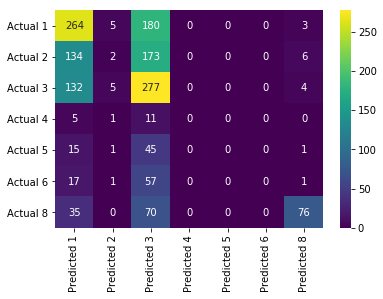

In [63]:
y_pred = pipeline.predict(X_val)
plot_confusion_matrix(y_val, y_pred);

In [64]:
# Get precision & recall for majority class baseline
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.44      0.58      0.50       452
           2       0.13      0.01      0.01       315
           3       0.34      0.66      0.45       418
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        62
           6       0.00      0.00      0.00        76
           8       0.84      0.42      0.56       181

    accuracy                           0.41      1521
   macro avg       0.25      0.24      0.22      1521
weighted avg       0.35      0.41      0.34      1521



In [0]:
# Another way to get a classification report using an ROC_AUC approach (https://stackoverflow.com/questions/39685740/calculate-sklearn-roc-auc-score-for-multi-class?rq=1), 
import pandas as pd
import numpy as np
from scipy import interp

from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    return class_report_df

In [66]:
# The above function provides the predicted values for each class. 
class_report(y_val, y_pred, y_score=None, average='micro')

,precision,recall,f1-score,support,pred
1,0.438538,0.584071,0.500949,452.0,602.0
2,0.133333,0.006349,0.012121,315.0,15.0
3,0.340713,0.662679,0.450041,418.0,813.0
8,0.835165,0.419890,0.558824,181.0,91.0
avg / total,0.350955,0.406969,0.341559,1366.0,1366.0


In [67]:
# Deriving an ROC curve for each class in cigarettes_per_day_bins
# Transform y_val and y_pred to arrays that are 1521 by 8 with bins as the columns

y_val_trans = pd.DataFrame(columns=['1','2','3','4','5','6','7', '8'])
y_val_trans['1']=y_val.map(lambda x : 1 if x==1 else 0)
y_val_trans['2']=y_val.map(lambda x : 1 if x==2 else 0)
y_val_trans['3']=y_val.map(lambda x : 1 if x==3 else 0)
y_val_trans['4']=y_val.map(lambda x : 1 if x==4 else 0)
y_val_trans['5']=y_val.map(lambda x : 1 if x==5 else 0)
y_val_trans['6']=y_val.map(lambda x : 1 if x==6 else 0)
y_val_trans['7']=y_val.map(lambda x : 1 if x==7 else 0)
y_val_trans['8']=y_val.map(lambda x : 1 if x==8 else 0)
print ('y_val_trans =')
print (y_val_trans.head(), '\n')

y_pred_proba = model.predict_proba(X_val)

y_pred_trans = pd.DataFrame(y_pred_proba)

print ('y_pred_trans')
print (y_pred_trans.head(), '\n')

y_val_trans =
       1  2  3  4  5  6  7  8
31502  0  0  1  0  0  0  0  0
4439   1  0  0  0  0  0  0  0
27082  0  1  0  0  0  0  0  0
19317  0  1  0  0  0  0  0  0
2063   0  0  0  0  1  0  0  0 

y_pred_trans
          0         1         2         3         4         5         6  \
0  0.162829  0.231963  0.274223  0.025535  0.111526  0.089346  0.018483   
1  0.352300  0.222662  0.236904  0.019437  0.033926  0.037057  0.017966   
2  0.226325  0.245213  0.304302  0.021091  0.054260  0.048242  0.018812   
3  0.014628  0.058306  0.106423  0.013221  0.012854  0.014086  0.012933   
4  0.272297  0.140279  0.227142  0.020462  0.057386  0.220636  0.016429   

          7  
0  0.086095  
1  0.079748  
2  0.081754  
3  0.767550  
4  0.045370   



In [68]:
# Learn to predict each class against the other
print(__doc__)

import numpy as np

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_val_trans.iloc[:, i], y_pred_trans.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_trans.values.ravel(), y_pred_trans.values.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


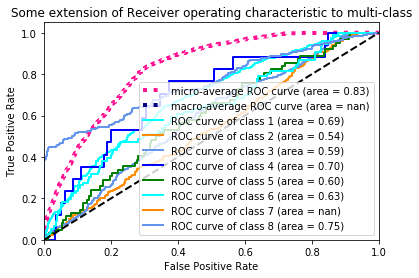

In [69]:
# Compute macro-average ROC curve and ROC area
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import interp
n_classes = 8
lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'blue', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()